In [189]:
## Initialize
from scipy.optimize import curve_fit
import numpy as np; from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import pandas as pd; import sys
from scipy.signal import argrelmax; from scipy import signal
from numpy import NaN, Inf, arange, isscalar, asarray, array
import numpy.polynomial.polynomial as poly
import timeit; from collections import defaultdict
import copy

label_size = 15 #make tick label size larger on plots
plt.rcParams['xtick.labelsize'] = label_size; plt.rcParams['ytick.labelsize'] = label_size

def multigauss(x, *params): #define multiple gauss function
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

def peakdet(v, delta, x = None): #peak finding algorithm from https://gist.github.com/endolith/250860
    maxtab = []
    mintab = []
    if x is None:
        x = arange(len(v))
    v = asarray(v) 
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')  
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')   
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN   
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]       
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True              
    return array(maxtab), array(mintab)

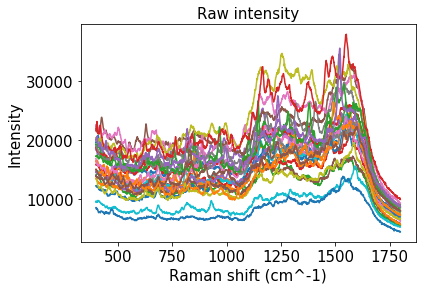

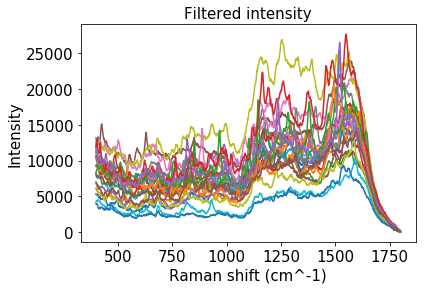

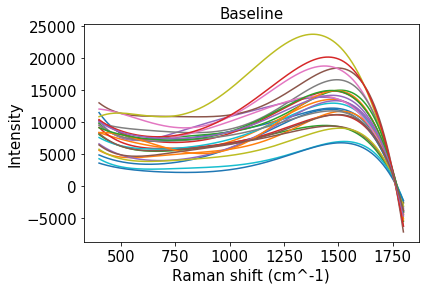

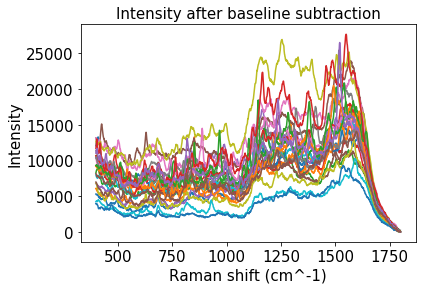

In [108]:
#Load in spectra, filter spectra, and subtract baselines from spectra
rawdata = pd.read_csv('sers5au40.txt', delimiter='\t')
x = np.array(rawdata.iloc[:,0]) #define x-axis by first column

rawspectra = rawdata.copy()
rawspectra = rawspectra.drop(rawspectra.columns[[0]], axis=1) # remove 1st column (x-values) from spectra dataframe
###############################################################################################################
filtspectra0 = np.array([]) #get one matrix of filterred spectra
spectranames = []
for i in range(len(rawspectra.columns)):
    spectranames.append(rawspectra.columns[i]) #make list of spectra names from file headers
    plt.plot(x, rawspectra.iloc[:,i]); plt.title('Raw intensity', fontsize=15) #plot raw intensities
    plt.xlabel('Raman shift (cm^-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15)
    
    filtspectra0 = np.hstack((filtspectra0, savgol_filter(rawspectra.iloc[:,i], #Filter:
                                                          5, 2, mode='mirror'))) #points, polynomial order, bound. cond.
plt.show() #show raw intensities plot
    
filtspectra0 = np.reshape(filtspectra0,(len(rawspectra.columns),len(x))) #reshape matrix

for i in range(len(filtspectra0)):
    filtspectra0[i] = filtspectra0[i] - np.min(filtspectra0[i]) #subtract minimum from each spectra
    plt.plot(x, filtspectra0[i])
plt.title('Filtered intensity', fontsize=15)
plt.xlabel('Raman shift (cm^-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15); plt.show()



#Subtract baseline/background from each spectrum
#############################################################
polydeg = 5 # degree of fitting polynomial
#############################################################
filtspectra = np.array([]) #create empty arrays to put spectra and baselines into
bsarray = np.array([])

for i in range(len(filtspectra0)):
    filtspectra = np.hstack((filtspectra, filtspectra0[i])) # add spectrum to spectraarray matrix
    bscoeffs = poly.polyfit(x, filtspectra0[i], polydeg) # find coefficients of polynomial fit
    bsarray = np.hstack((bsarray, poly.polyval(x, bscoeffs))) # add fit to bsarray matrix

filtspectra = np.reshape(filtspectra,(len(rawspectra.columns),len(x))) #reshape matrixes of spectra and baseline fits
bsarray = np.reshape(bsarray,(len(rawspectra.columns),len(x)))

for i in range(len(bsarray)): # plot all baselines
    plt.plot(x, bsarray[i])
plt.xlabel('Raman shift (cm^-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15)
plt.title('Baseline', fontsize=15); plt.show()

for i in range(len(filtspectra)): # subtract baselines and add offset to avoid intensity < 0
    #filtspectra[i] = np.subtract(filtspectra[i], bsarray[i]) ###SUBTRACT BASELINE#####################################
    if np.min(filtspectra[i]) < 0:
         filtspectra[i] = filtspectra[i] + np.absolute(np.amin(filtspectra[i])) 
    if np.min(filtspectra[i]) > 0:
        filtspectra[i] = filtspectra[i] - np.absolute(np.amin(filtspectra[i])) 
    if np.min(filtspectra[i]) == 0:
        pass
        
    plt.plot(x,filtspectra[i])

plt.title('Intensity after baseline subtraction', fontsize=15)
plt.xlabel('Raman shift (cm^-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15); plt.show()

spectra = t1
number of peaks = 84
peak-finding time = 0.002 seconds
fitting time =18.419012438026645 minutes


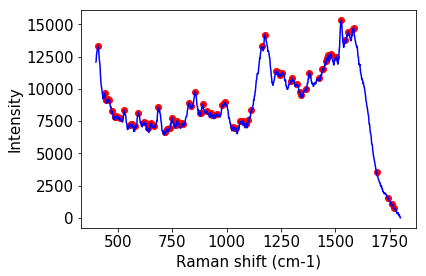

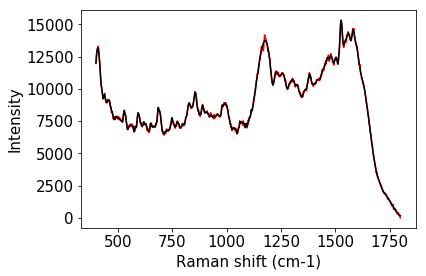

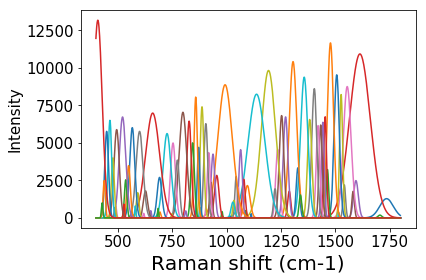

spectra = t2
number of peaks = 75
peak-finding time = 0.002 seconds
fitting time =43.64296538026635 minutes


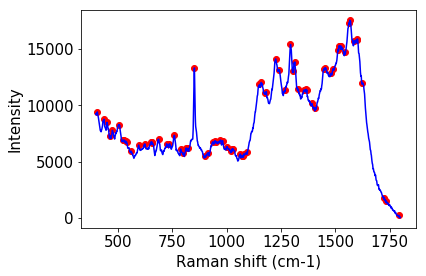

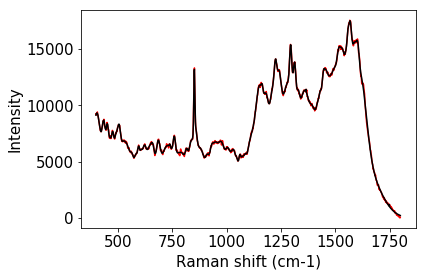

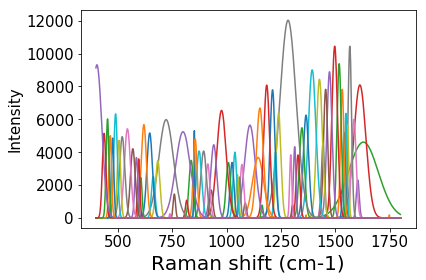

spectra = t3
number of peaks = 77
peak-finding time = 0.002 seconds
fitting time =1.0598377260786946 minutes


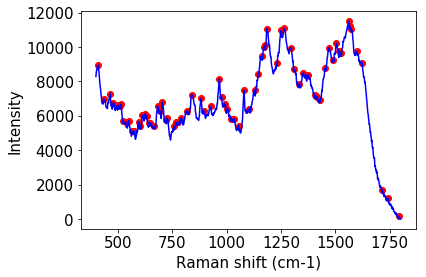

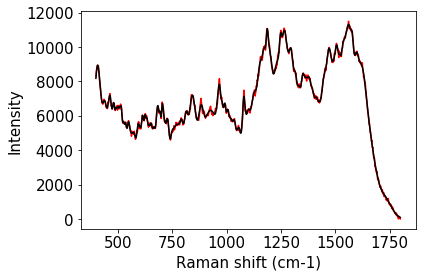

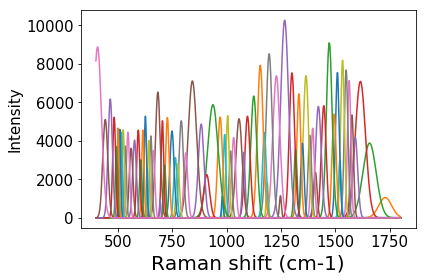

spectra = t4
number of peaks = 86
peak-finding time = 0.002 seconds
fitting time =6.234163505769296 minutes


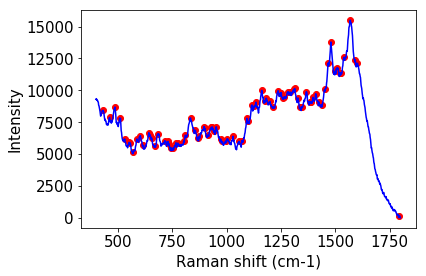

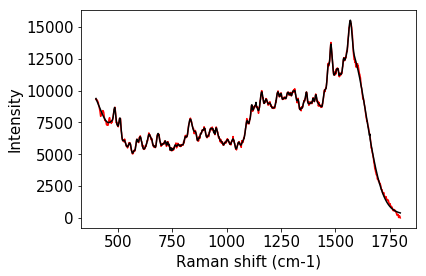

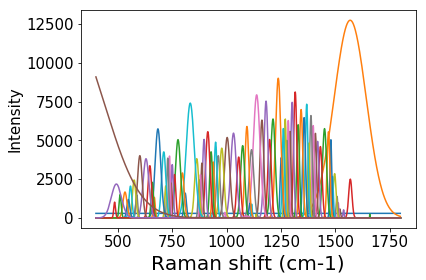

spectra = t5
number of peaks = 83
peak-finding time = 0.002 seconds
fitting time =12.53040009195344 minutes


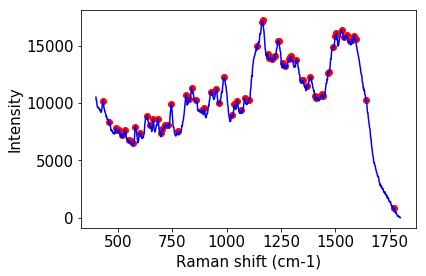

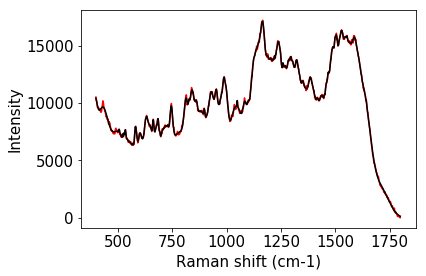

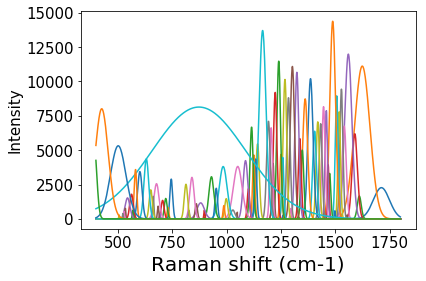

spectra = t6
number of peaks = 97
peak-finding time = 0.002 seconds
fitting time =24.375043467943517 minutes


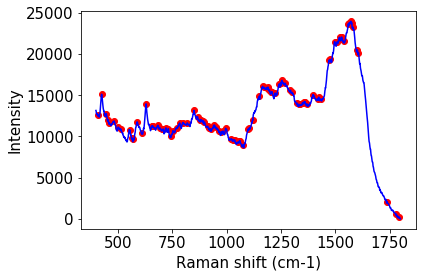

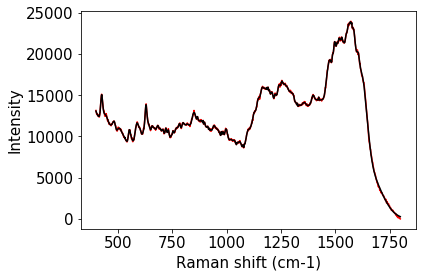

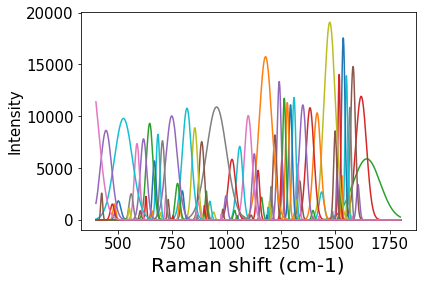

spectra = t7
number of peaks = 84
peak-finding time = 0.002 seconds
fitting time =11.916060265820125 minutes


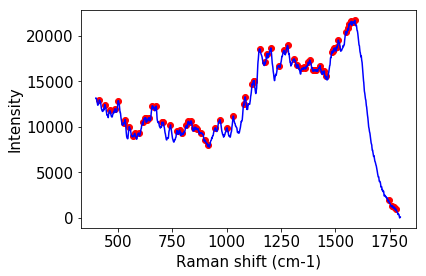

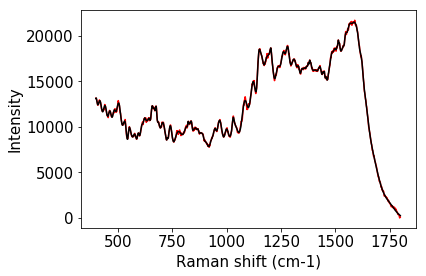

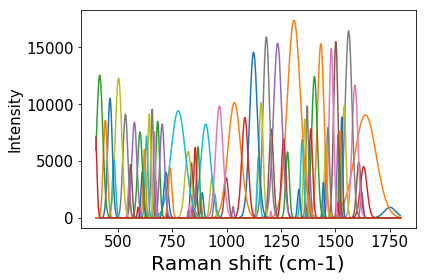

spectra = t8
number of peaks = 72
peak-finding time = 0.002 seconds
fitting time =8.02825189109911 minutes


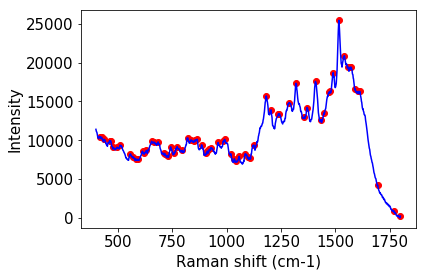

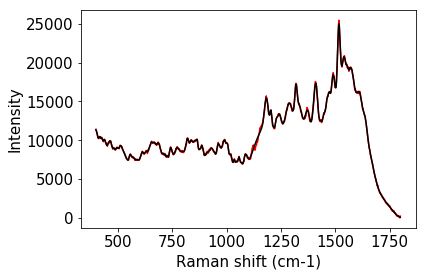

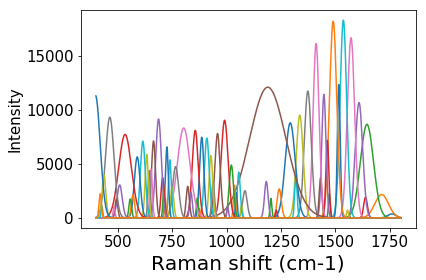

spectra = t9
number of peaks = 81
peak-finding time = 0.002 seconds
fitting time =16.110550748823638 minutes


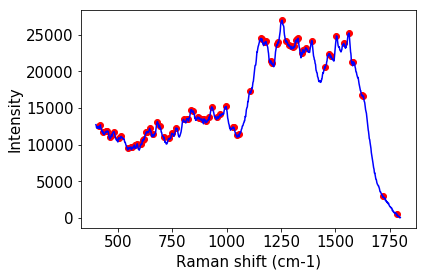

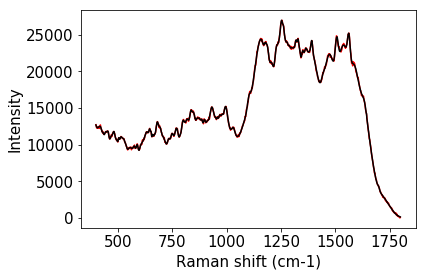

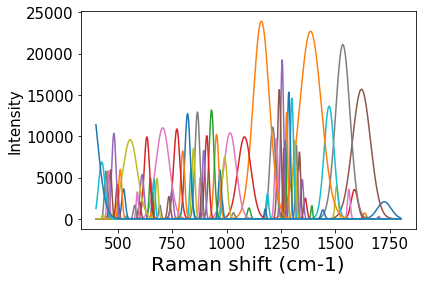

spectra = t10
number of peaks = 82
peak-finding time = 0.002 seconds
fitting time =0.8634332648032189 minutes


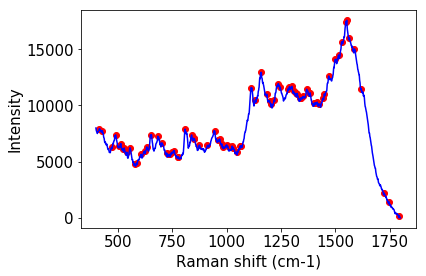

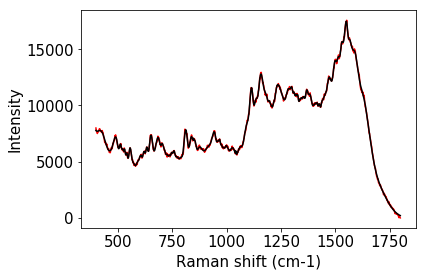

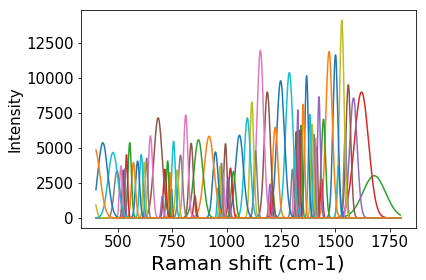

spectra = t11
number of peaks = 79
peak-finding time = 0.002 seconds
fitting time =12.88282376897793 minutes


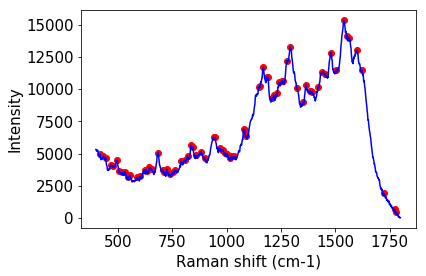

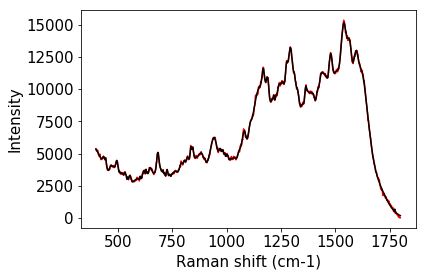

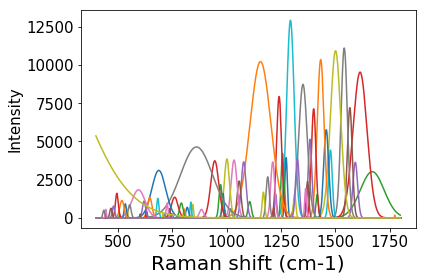

spectra = t12
number of peaks = 76
peak-finding time = 0.002 seconds
fitting time =18.76554286801887 minutes


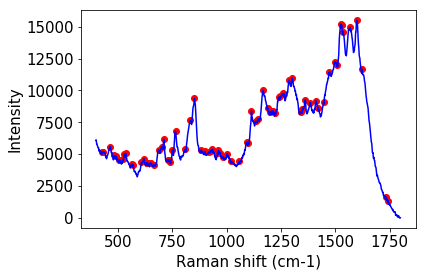

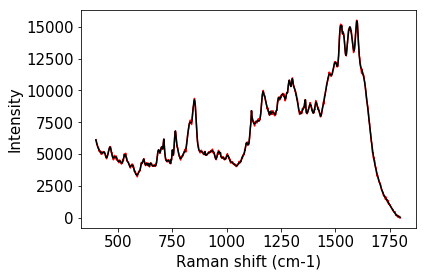

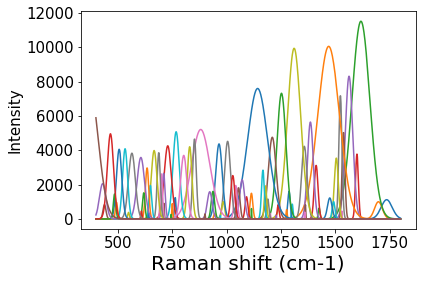

spectra = t13
number of peaks = 84
peak-finding time = 0.002 seconds
fitting time =10.271768729295097 minutes


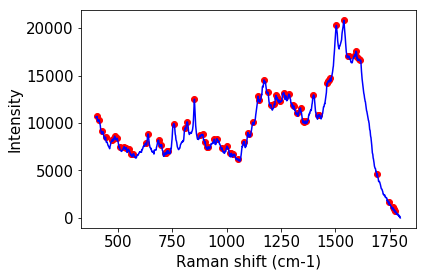

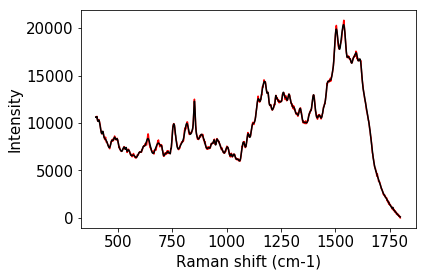

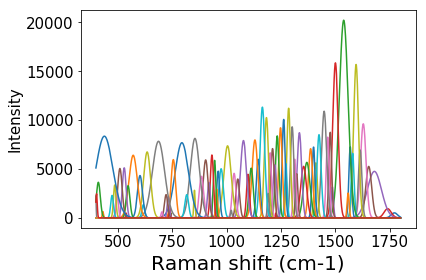

spectra = t14
number of peaks = 88
peak-finding time = 0.002 seconds
fitting time =13.102378007525113 minutes


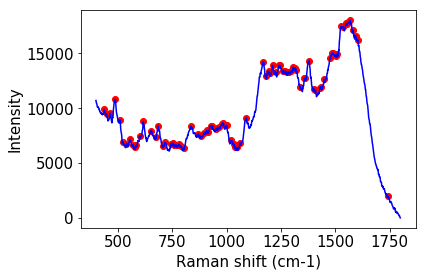

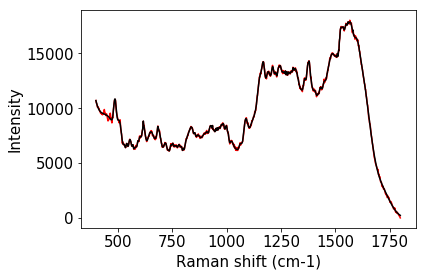

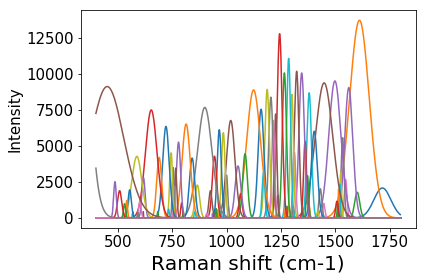

spectra = t15
number of peaks = 86
peak-finding time = 0.002 seconds
fitting time =14.459458962344797 minutes


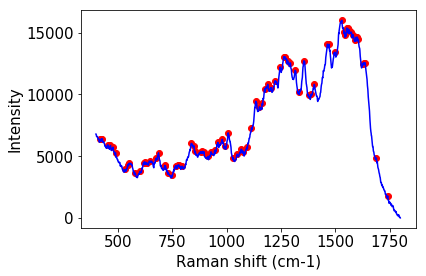

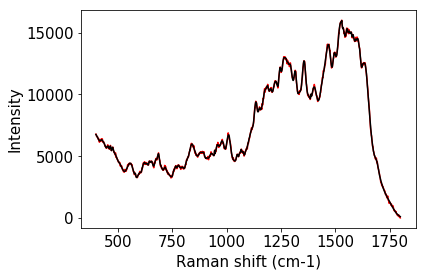

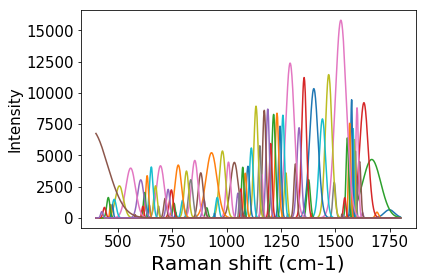

spectra = t16
number of peaks = 76
peak-finding time = 0.002 seconds
fitting time =2.175535752638825 minutes


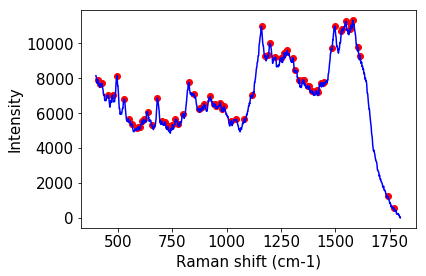

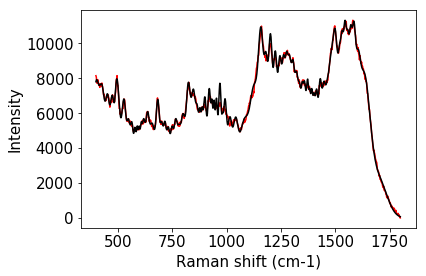

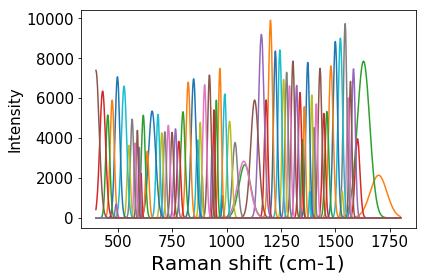

spectra = t17
number of peaks = 82
peak-finding time = 0.002 seconds
fitting time =6.666879705667088 minutes


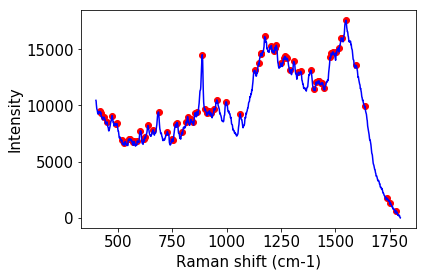

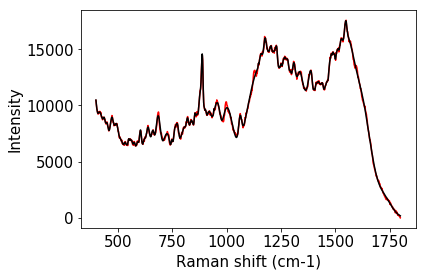

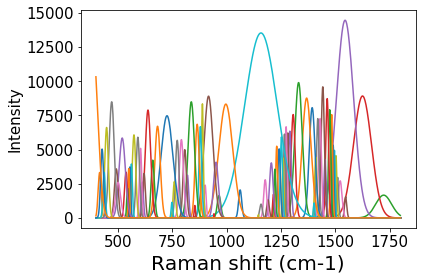

spectra = t18
number of peaks = 86
peak-finding time = 0.002 seconds
fitting time =26.819124787812083 minutes


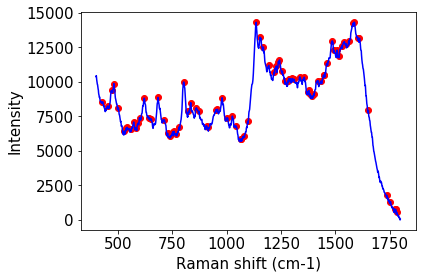

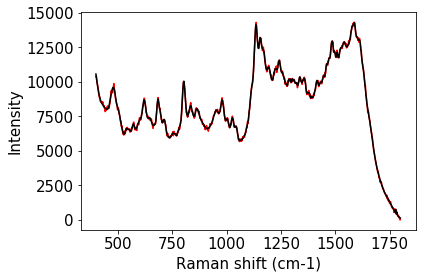

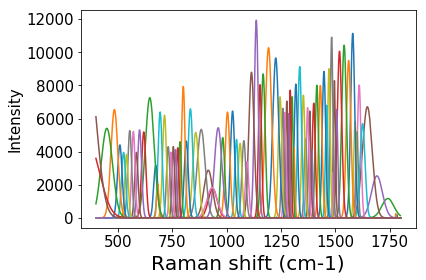

spectra = t19
number of peaks = 85
peak-finding time = 0.002 seconds
fitting time =10.82784999822082 minutes


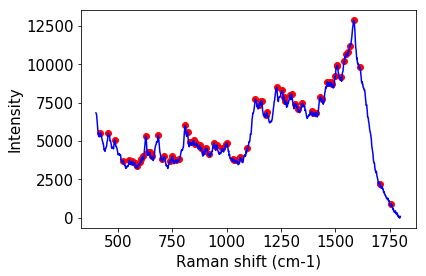

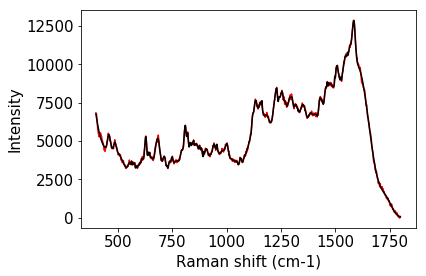

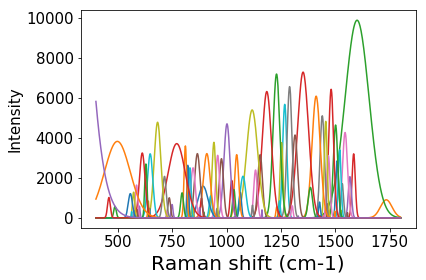

spectra = t20
number of peaks = 72
peak-finding time = 0.002 seconds
fitting time =9.510847459775201 minutes


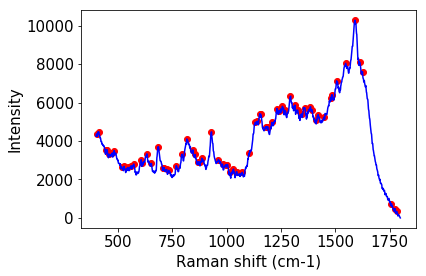

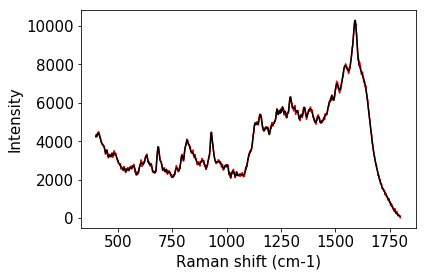

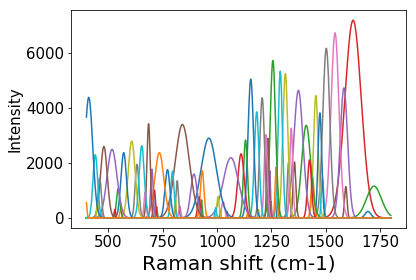

spectra = t21
number of peaks = 76
peak-finding time = 0.002 seconds
fitting time =2.1425022405955434 minutes


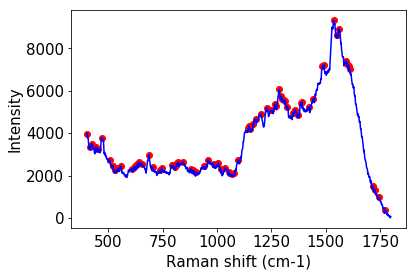

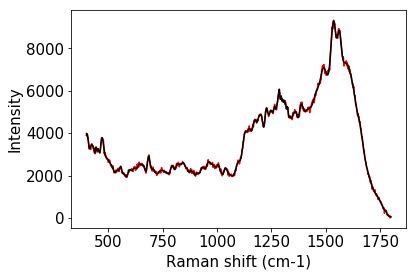

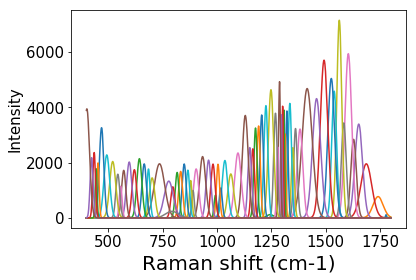

spectra = t22
number of peaks = 63
peak-finding time = 0.002 seconds
fitting time =24.160124658022443 minutes


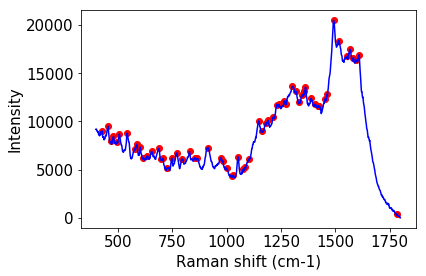

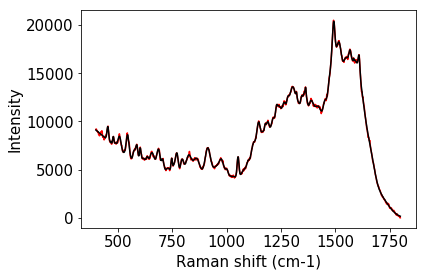

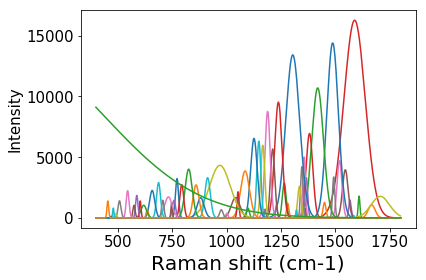

spectra = t23
number of peaks = 76
peak-finding time = 0.002 seconds
fitting time =14.945874967712735 minutes


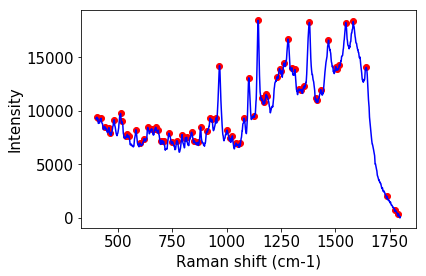

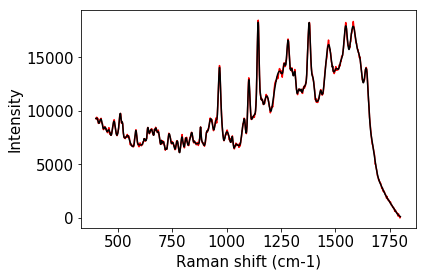

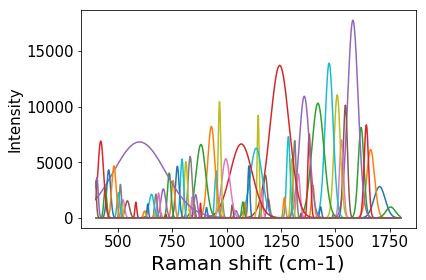

spectra = t24
number of peaks = 79
peak-finding time = 0.002 seconds
fitting time =10.473770430637524 minutes


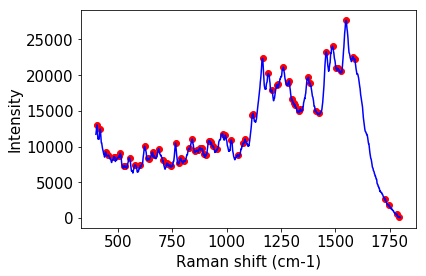

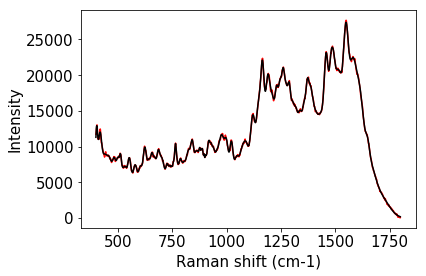

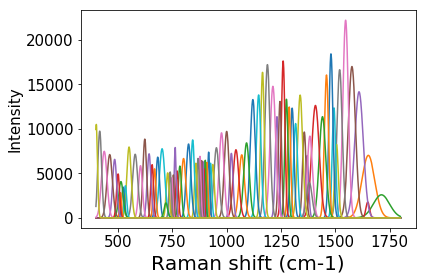

spectra = t25
number of peaks = 90
peak-finding time = 0.002 seconds
fitting time =4.862715851745452 minutes


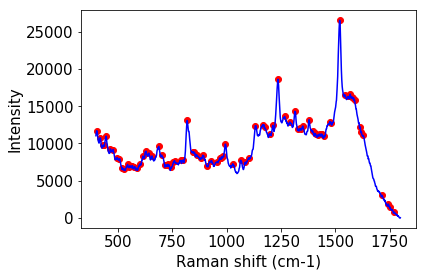

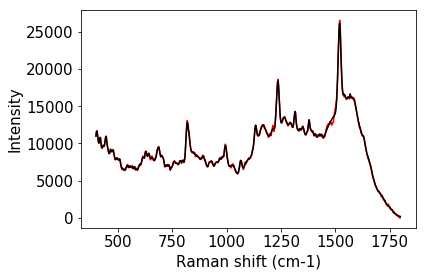

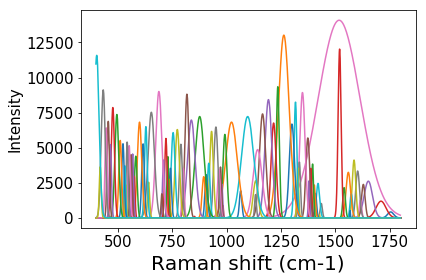

spectra = t26
number of peaks = 71
peak-finding time = 0.002 seconds
fitting time =10.99457903165797 minutes


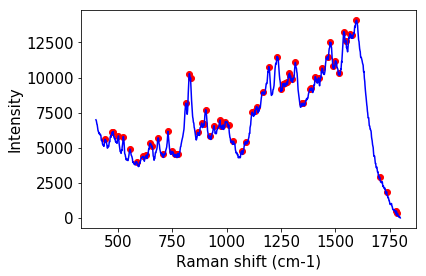

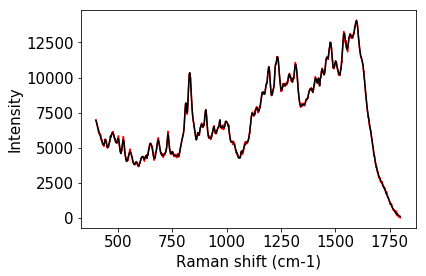

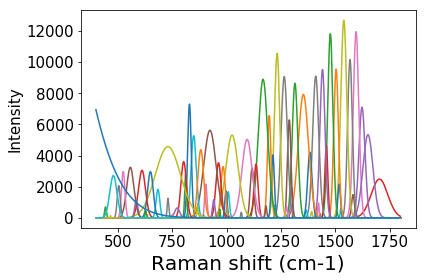

total analysis time =336.6969246110219 minutes


In [109]:
## Find peaks in each spectra
#######################################
minpeakheight = 100 #set a minimum peak height to search for
#######################################    
hibound = 100000 #set fitting bounds
lobound = 0
#######################################
start_analysis_time = timeit.default_timer() # state peak detection timer
peakinfo = defaultdict(list)

for i in range(len(filtspectra)): #loop over spectra to find peaks 
    start_peak_time = timeit.default_timer() # state peak detection timer
    
    print('spectra = ' + format(spectranames[i]))
    maxtab, mintab = peakdet(filtspectra[i], minpeakheight, x) #find peaks
    peaks = np.copy(maxtab); peaksx = array(peaks)[:,0]; peaksy = array(peaks)[:,1]
    print('number of peaks = ' + format(len(peaksx)))
    print('peak-finding time = ' + format(round(timeit.default_timer() - start_peak_time, 3))+ ' seconds')
    
    ## Fit peaks in each spectra
    start_fit_time = timeit.default_timer()
    
    #guess peak centers, amplitudes, widths
    guess = np.ones(len(peaksx)*3)
    for g in range(0,len(guess),3):
        guess[g] = peaksx[round(g/3)] #guess centers
        guess[g+1] = peaksy[round((g-1)/3)] #guess intensities
        guess[g+2] = 5 #guess widths

    # find fit parameters
    popt, pcov = curve_fit(multigauss, x, filtspectra[i], bounds=(lobound,hibound), p0=guess, ftol=5e-6, xtol=1e-7)
    fit = multigauss(x, *popt) #build fit from parameters

    ############################# save fit parameters
    centers = np.array([]); amplitudes = np.array([]); widths = np.array([])
    for j in range(0,len(popt),3): # build lists of fitting parameters
        centers = np.append(centers, popt[j])
        amplitudes = np.append(amplitudes, popt[j+1])
        widths = np.append(widths, popt[j+2])
    print('fitting time =' + format((timeit.default_timer() - start_fit_time)/60) + ' minutes')
    
    plt.scatter(peaksx, peaksy, color='r') #plot peaks
    plt.plot(x,filtspectra[i], color='b')
    plt.ylabel('Intensity', fontsize=15)
    plt.xlabel('Raman shift (cm-1)', fontsize=15); plt.show()
       
    plt.plot(x, filtspectra[i], 'r-') #plot spectrum and its fit
    plt.plot(x, fit , 'k-'); plt.xlabel('Raman shift (cm-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15) 
    plt.show()
    
    for k in range(len(centers)): #plot deconvoluted peaks
        y = amplitudes[k] * np.exp( -((x - centers[k])/widths[k])**2)
        plt.plot(x,y)
    plt.xlabel('Raman shift (cm-1)', fontsize=20); plt.ylabel('Intensity', fontsize=15); plt.show()

    peakinfo[spectranames[i]].append(centers) #build dictionary of peak infor for each spectra
    peakinfo[spectranames[i]].append(amplitudes)
    peakinfo[spectranames[i]].append(widths)
print('total analysis time =' + format((timeit.default_timer() - start_analysis_time)/60) + ' minutes')

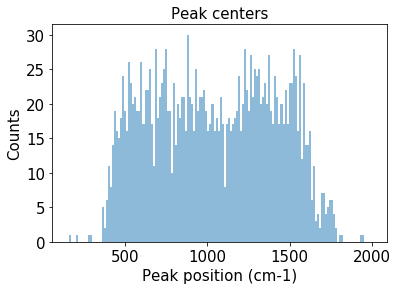

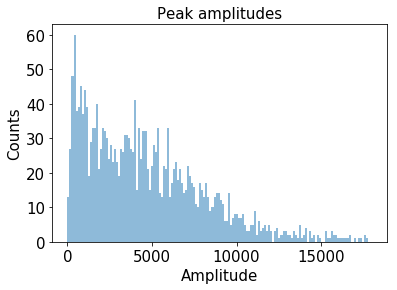

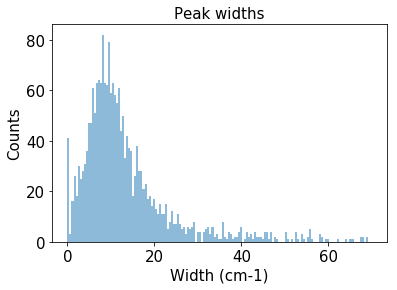

In [263]:
#analyze peaks
allcenters = np.array([]) #lists which are all merged
allwidths = np.array([])
allamplitudes = np.array([])

allcenterlists = [] #lists which keep each sample saparate in nested lists
allwidthlists = []
allamplitudelists = []


for i in range(len(spectranames)): #combine all peak info into arrays
    allcenters = np.append(allcenters, peakinfo[spectranames[i]][0]) #lists which are all merged
    allamplitudes = np.append(allamplitudes, peakinfo[spectranames[i]][1])
    allwidths = np.append(allwidths, peakinfo[spectranames[i]][2])
    
    allcenterlists.append(peakinfo[spectranames[i]][0]) #lists which keep each sample saparate in nested lists
    allamplitudelists.append(peakinfo[spectranames[i]][1])
    allwidthlists.append(peakinfo[spectranames[i]][2])
    
 
bins = 150  #plot histograms of peak data 
    
plt.hist(allcenters, range=[150, 2000], bins=bins, alpha=0.5)
plt.xlabel('Peak position (cm-1)', fontsize=15); plt.title('Peak centers', fontsize=15)
plt.ylabel('Counts', fontsize=15); #plt.yscale('log', nonposy='clip')
plt.show()

plt.hist(allamplitudes, range=[0, 18000], bins=bins, alpha=0.5)
plt.xlabel('Amplitude', fontsize=15); plt.title('Peak amplitudes', fontsize=15)
plt.ylabel('Counts', fontsize=15); #plt.yscale('log', nonposy='clip')
plt.show()

plt.hist(allwidths, range=[0, 70], bins=bins, alpha=0.5)
plt.xlabel('Width (cm-1)', fontsize=15); plt.title('Peak widths', fontsize=15)
plt.ylabel('Counts', fontsize=15); #plt.yscale('log', nonposy='clip')
plt.show()

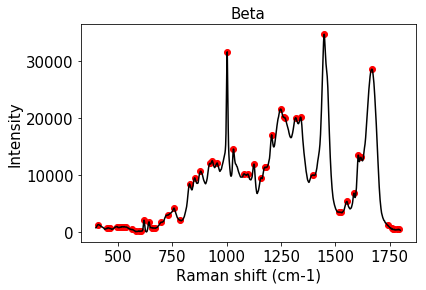

peak-finding time = 0.6369236370082945 seconds
number of peaks = 59


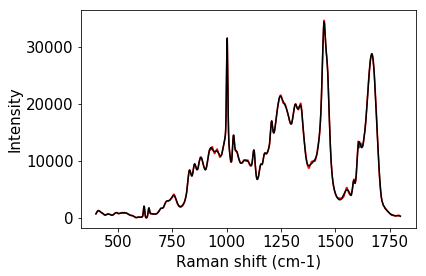

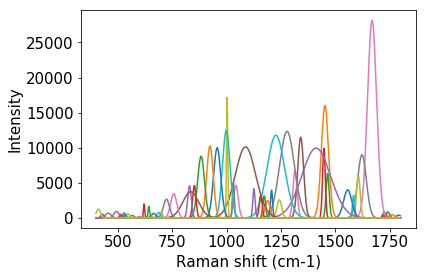

Number of peaks = 59
fitting time =1.5882930627674796 minutes


In [255]:
## Load bulk casein peak data for beta casein
bcdata = pd.read_csv('a b k bulk spectra.txt', delimiter="\t")
bcx = np.array(bcdata['shiftb']) #define x-axis (Raman shift variable)
b = np.array(bcdata['b'])

filtb = savgol_filter(b, 5, 2, mode='mirror') #filter spectrum

#######################################
minpeakheight2 = 12 #set a minimum peak height to search for
#######################################

start_peak_time = timeit.default_timer()

#get peaks
maxtab, mintab = peakdet(filtb,minpeakheight2,bcx) 
bpeaks = np.copy(maxtab); bpeaksx = array(bpeaks)[:,0]; bpeaksy = array(bpeaks)[:,1]

#guess peak centers, amplitudes, widths
cguess = np.ones(len(bpeaks)*3)
for g in range(0,len(cguess),3):
    cguess[g] = bpeaksx[round(g/3)] #guess centers
    cguess[g+1] = bpeaksy[round((g-1)/3)] #guess intensities
    cguess[g+2] = 5 #guess widths

plt.scatter(array(bpeaks)[:,0], array(bpeaks)[:,1], color='r') #plot peak maximums
plt.plot(bcx,filtb, color='k')
plt.title('Beta',fontsize=15, ha='center'); plt.ylabel('Intensity', fontsize=15)
plt.xlabel('Raman shift (cm-1)', fontsize=15); plt.show()
print('peak-finding time = ' + format(timeit.default_timer() - start_peak_time) + ' seconds')
print('number of peaks = ' + format(len(bpeaksx)))

## Fit peaks
start_fit_time = timeit.default_timer()

hibound2 = 100000 #set fitting bounds
lobound2 = 0

popt, pcov = curve_fit(multigauss, bcx, filtb, ftol=5e-6, xtol=1e-7, p0=cguess, bounds=(lobound2,hibound2)) # find fit parameters
fit = multigauss(bcx, *popt) #build fit from parameters

############################# save fit parameters
bccenters = np.array([]); bcamplitudes = np.array([]); bcwidths = np.array([])
for i in range(0,len(popt),3): # build lists of fitting parameters
    bccenters = np.append(bccenters, popt[i])
    bcamplitudes = np.append(bcamplitudes, popt[i+1])
    bcwidths = np.append(bcwidths, popt[i+2])

plt.plot(bcx, filtb, 'r-') #plot spectrum and its fit
plt.plot(bcx, fit , 'k-'); plt.xlabel('Raman shift (cm-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15) 
plt.show()
     
for i in range(len(bccenters)): #plot deconvoluted peaks
    y = bcamplitudes[i] * np.exp( -((bcx - bccenters[i])/bcwidths[i])**2)
    plt.plot(bcx,y)
plt.xlabel('Raman shift (cm-1)', fontsize=15); plt.ylabel('Intensity', fontsize=15); plt.show()
print('Number of peaks = ' + format(len(bccenters)))
print('fitting time =' + format((timeit.default_timer() - start_fit_time)/60) + ' minutes')


In [257]:
# compare spectra to bulk casein spectra

bccentersr = copy.copy(bccenters) #make arrays with rounded numbers
allcenterlistsr = copy.copy(allcenterlists)

digits = 0 #how many decimal places to round to

#round all numbers
for i in range(len(bccenters)):
    bccentersr[i] = round(bccenters[i],digits)
for i in range(len(allcenterlists)):
    for j in range(len(allcenterlists[i])):
        allcenterlistsr[i][j] = round(allcenterlists[i][j],digits)
        
cpeaksdict = dict() # make dictionary of peak centers from casein that show up in each spectra

for i in range(len(allcenterlistsr)):
    cpeaksdict[spectranames[i]] = set(list(bccentersr)).intersection(allcenterlistsr[i])
    

In [258]:
cpeaksdict

{'t1': {528.0, 536.0},
 't10': {620.0, 756.0, 1031.0, 1207.0, 1584.0},
 't11': {595.0, 620.0, 835.0, 1189.0},
 't12': {493.0, 852.0, 1189.0, 1412.0},
 't13': {410.0, 687.0, 852.0, 1465.0},
 't14': {653.0},
 't15': {653.0, 687.0, 835.0, 1173.0, 1189.0},
 't16': {528.0, 1584.0},
 't17': {493.0, 620.0, 852.0, 1242.0},
 't18': {1448.0, 1742.0},
 't19': {1002.0, 1315.0, 1412.0},
 't2': {595.0, 1557.0},
 't20': {517.0, 653.0, 1207.0, 1242.0, 1341.0},
 't21': {642.0, 665.0},
 't22': {687.0, 1002.0, 1126.0, 1189.0, 1584.0},
 't23': {687.0, 882.0, 1043.0},
 't24': {512.0, 1043.0},
 't25': {455.0, 852.0},
 't26': {611.0, 829.0, 923.0, 1623.0},
 't3': {493.0, 546.0, 642.0},
 't4': {493.0},
 't5': {528.0, 998.0, 1087.0},
 't6': {923.0, 1242.0},
 't7': set(),
 't8': {493.0, 687.0, 1189.0, 1242.0, 1412.0, 1448.0},
 't9': {455.0, 611.0, 653.0, 1242.0, 1725.0}}